<a href="https://colab.research.google.com/github/PRATYAY8BOSE/MACHINE-LEARNING-PROJECT/blob/main/Python_minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PYTHON MINI PROJECT 

NAME PRATYAY BOSE

email:pratyaybose8@gmail.com 

In [ ]:
!pip install bing-image-downloader

GATHERING DATA - downloading images


In [ ]:
from bing_image_downloader import downloader
downloader.download('medicine pills', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
downloader.download('medicine syrups', limit=30,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/images/medicine pills


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://s24990.pcdn.co/wp-content/uploads/2017/07/medicine-2449619_640.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://truerecovery.com/wp-content/uploads/2018/12/Fake-Prescription-Pill-Dangers.png
[!] Issue getting: https://truerecovery.com/wp-content/uploads/2018/12/Fake-Prescription-Pill-Dangers.png
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://media.npr.org/assets/news/2009/10/20/pills-f4b20ce772142963da515c2bc0c20d3b64d337aa-s1200.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.90daymeds.com/wp-content/uploads/2020/04/prescription-drugs.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.trueactivist.com/wp-content/uploads/2016/02/drugs1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.guim.co.uk/img/static/sys-images/Admin/BkFill/Defaul

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [ ]:
datadir = '/content/images'

categories = ['medicine pills','medicine syrups'] 
target = []
flat_data = []

for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    print(img)
    img_array = imread(os.path.join(path,img))

    img_resize = resize(img_array,(100,100,3)) # 
    flat_data.append(np.ndarray.flatten(img_resize))
    target.append(i)
    


flat_data = np.array(flat_data)
target = np.array(target)

Image_3.jpeg
Image_14.jpg
Image_4.jpg
Image_19.jpg
Image_6.jpg
Image_17.jpeg
Image_23.jpg
Image_21.jpg
Image_13.jpg
Image_7.jpg
Image_22.jpg
Image_24.png
Image_18.png
Image_27.jpg
Image_15.jpeg
Image_26.jpg
Image_20.jpg
Image_16.jpg
Image_2.jpg
Image_9.jpg
Image_10.jpg
Image_8.jpg
Image_5.jpg
Image_29.jpeg
Image_28.jpg
Image_11.jpg
Image_1.jpg
Image_12.jpg
Image_30.jpg
Image_25.jpg
Image_17.jpg
Image_14.jpg
Image_4.jpg
Image_19.jpg
Image_6.jpg
Image_23.JPG
Image_23.jpg
Image_21.jpg
Image_4.png
Image_13.jpg
Image_7.jpg
Image_22.jpg
Image_15.jpg
Image_29.jpg
Image_27.jpg
Image_26.jpg
Image_20.jpg
Image_6.png
Image_16.jpg
Image_5.png
Image_2.jpg
Image_9.jpg
Image_10.jpg
Image_8.jpg
Image_3.jpg
Image_5.jpg
Image_10.png
Image_28.jpg
Image_11.jpg
Image_1.jpg
Image_12.jpg
Image_24.jpg
Image_18.jpg
Image_30.jpg
Image_28.JPG
Image_25.jpg


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target


In [ ]:
df['target']= [1 if i=='medicine pills' else 0 for i in df.Target]

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target,target
0,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.901961,0.862745,0.827451,0.905882,0.866667,0.831373,0.905882,0.866667,0.831373,0.905882,0.866667,0.831373,0.901961,0.866667,0.827451,0.898039,0.866667,0.827451,0.901961,...,0.819608,0.780392,0.858824,0.819608,0.780392,0.862745,0.823529,0.784314,0.860784,0.821569,0.782353,0.858824,0.819608,0.780392,0.862745,0.823529,0.784314,0.862745,0.823529,0.784314,0.858824,0.819608,0.780392,0.854902,0.815686,0.776471,0.854902,0.815686,0.776471,0.854902,0.815686,0.776471,0.858824,0.819608,0.780392,0.858824,0.819608,0.780392,medicine pills,1
1,0.313725,0.175644,0.027451,0.333333,0.188235,0.039216,0.352941,0.200000,0.043137,0.374980,0.223529,0.062745,0.427216,0.274510,0.109569,0.470588,0.313725,0.141176,0.458824,0.299060,0.121569,0.443137,0.286275,0.105882,0.304157,0.191294,0.057961,0.166510,0.105882,0.031373,0.164157,0.105882,0.035294,0.180392,0.121569,0.054902,0.200000,0.133333,0.070588,0.152941,...,0.258824,0.116157,0.400000,0.266667,0.117647,0.407843,0.269098,0.117647,0.415686,0.266667,0.121569,0.415686,0.266667,0.125490,0.419608,0.266667,0.125490,0.423529,0.266667,0.124000,0.423529,0.266667,0.121569,0.429882,0.274510,0.125490,0.433804,0.280863,0.129412,0.435294,0.280863,0.121569,0.431373,0.278431,0.121569,0.427451,0.274510,0.121569,medicine pills,1
2,0.152647,0.282059,0.655446,0.154574,0.282059,0.666505,0.156569,0.294044,0.678137,0.156863,0.305882,0.697760,0.160593,0.309804,0.705882,0.168525,0.321466,0.723926,0.168627,0.333039,0.744623,0.172549,0.338162,0.752721,0.176471,0.346961,0.756863,0.191319,0.371667,0.779804,0.199750,0.392701,0.799750,0.209475,0.401632,0.817319,0.215392,0.407770,0.823529,0.219314,...,0.831373,0.894118,0.803922,0.827451,0.898039,0.800588,0.819608,0.893868,0.792157,0.811765,0.886275,0.784314,0.803922,0.890196,0.777157,0.799706,0.885980,0.768613,0.796078,0.881877,0.756863,0.786672,0.882162,0.750392,0.780201,0.879804,0.745098,0.776471,0.870784,0.732132,0.768627,0.866667,0.721275,0.764706,0.870588,0.710392,0.753529,0.867255,medicine pills,1
3,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,medicine pills,1
4,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,medicine pills,1
...,...,...,...,..

In [ ]:
x = df.iloc[:, :30000].values
y = df.iloc[:, 30001].values

HYPERPARAMETER TUNING and model building using SVM and GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid= {'C':[0.1,1,10,100,1000],'kernel':['rbf','linear','poly']}
model=GridSearchCV(SVC(),param_grid)
model.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=model.predict(x_test)

EVALUATING THE MODEL

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.5882352941176471

In [ ]:
from sklearn.metrics import confusion_matrix
a=confusion_matrix(y_pred,y_test)
a

array([[8, 3],
       [4, 2]])

In [ ]:
TN=a[0][0]
TP=a[1][1]
FP=a[0][1]
FN=a[1][0]

print(f"Accuracy Score={(TN+TP)/(TN+TP+FN+FP)}")

Accuracy Score=0.5882352941176471


In [ ]:
print (f"Precision Positive or 1 = {TP/(TP+FP)}")
print(f"Precision Negative or 0 = {TN/(TN+FN)}")
print(f"Recall Postive or 1  = {TP/(TP+FN)}")
print(f"Recall Negative or 0 = {TN/(TN+FP)}")

Precision Positive or 1 = 0.4
Precision Negative or 0 = 0.6666666666666666
Recall Postive or 1  = 0.3333333333333333
Recall Negative or 0 = 0.7272727272727273


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        11
           1       0.40      0.33      0.36         6

    accuracy                           0.59        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.57      0.59      0.58        17



In [ ]:
import pickle
pickle.dump(model, open("image_classifier_model.p", "wb"))

PREDICTING for new image

In [ ]:
import pickle
pickle.dump(model,open('img_model.p','wb'))

Enter your urlhttps://static.onecms.io/wp-content/uploads/sites/38/2016/01/12220508/sumire8_0.jpg
(1200, 1800, 3)
 PREDICTED OUTPUT: medicine syrups


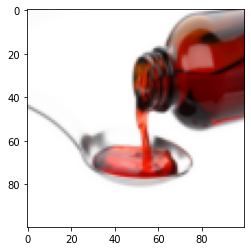

In [ ]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

Enter your urlhttps://cdn.britannica.com/53/143753-131-18E874E9/Aspirin-pills.jpg
(675, 900, 3)
 PREDICTED OUTPUT: medicine pills


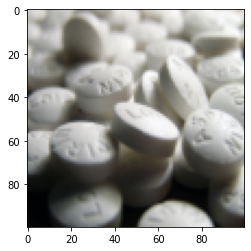

In [ ]:
flat_data = []
url = input('Enter your url')
img = imread(url)
img_resized = resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = categories[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')